<a href="https://colab.research.google.com/github/cakwok/Udacity---Self-Driving-Car-Engineer/blob/main/Udacity_Sensor_Fusion_Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
CS7180 Project 3 Time Sequence - Implementation of Kalman Filter to predict velocity
Wing Man Casca, Kwok
Oct 20, 2022
'''

'\nCS7180 Project 3 Time Sequence - Implementation of Kalman Filter to predict velocity\nWing Man Casca, Kwok\nOct 20, 2022\n'

In [2]:
#!pip install matplotlib

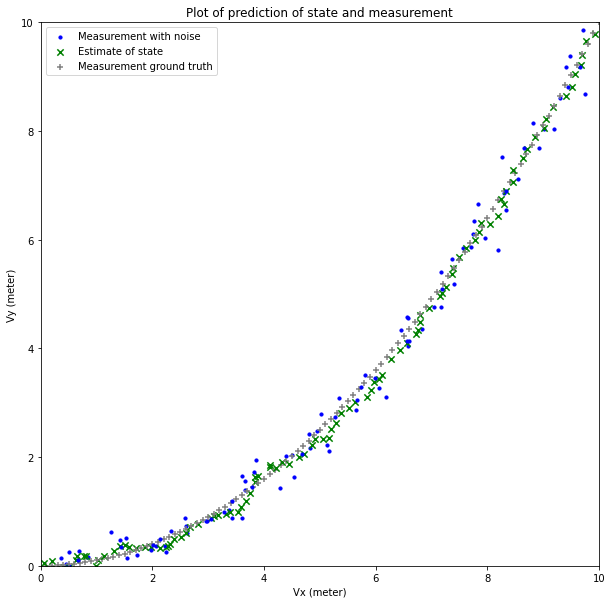

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output   #For animated plot
import sys

#Class to define Kalman Filter
class Filter:

    def __init__(self):
        self.dimension = 4          # define 4 dimensions (Px, Py, Vx, Vy)
        self.deltaTime = 0.1        # define delta time 0.1s
        self.q = 0.1                # define process noise of Kalman filter Q

    # define state transition matrix F
    def F(self):
        dt = self.deltaTime
        return np.matrix([[1, 0, dt, 0],
                          [0, 1, 0, dt],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1]])

    # define process noise / covaraiance Q
    def Q(self):
        q = self.q
        dt = self.deltaTime
        q1 = ((dt ** 3) / 3) * q 
        q2 = ((dt ** 2) / 2) * q 
        q3 = dt * q 
        return np.matrix([[q1, 0, q2, 0],
                          [0, q1, 0, q2],
                          [q2, 0, q3, 0],
                          [0, q2, 0,  q3]])

    # define measurement matrix H
    def H(self):
        return np.matrix([[1, 0, 0, 0],
                          [0, 1, 0, 0]]) 

    # predict state and estimation error covariance of next timestamp
    def predict(self, x, P):
        F = self.F()
        Q = self.Q()
        x = F * x 
        P = F * P * F.transpose() + Q 
        return x, P

    #update state and covariance with actual measurement
    def update(self, x, P, z, R):   
        H = self.H()  
        y = z - H * x                     # residual / error between actual measurement and estimation
        S = H * P * H.transpose() + R     # covariance of residual
        K = P * H.transpose() * np.linalg.inv(S)    # Kalman gain
        x = x + K * y                               # state update
        I = np.identity(self.dimension)
        P = (I - K * H) * P                         # covariance update
        return x, P  

def legend_remove_duplicating_labels(ax):

    handles, labels = ax.get_legend_handles_labels()
    
    unique_label = set(labels)
    unique_handle = [handles[labels.index(i)] for i in unique_label]
    unique = zip(unique_handle, unique_label)

    ax.legend(*zip(*unique))

def run_filter():
     
    np.random.seed(10) 
    
    # initialize kalman filter
    KF = Filter()

    # initialize figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # initialize state estimate x and uncertainty covariance P
    x = np.matrix([[0],
                [0],
                [0],
                [0]])
    P = np.matrix([[0.1**2, 0, 0, 0],
                   [0, 0.1**2, 0, 0],
                   [0, 0, 2**2, 0],
                   [0, 0, 0, 2**2]])
    
    ax.set_xlabel('Vx (meter)')
    ax.set_ylabel('Vy (meter)')
    ax.set_title('Plot of prediction of state and measurement')
    
    # run Kalman filter 
    for i in range(1,101):        
        
        # predict state of next timestamp
        # prediction estimate x
        # uncertainty covariance P
        x, P = KF.predict(x, P)  

        # simulate non linear ground truth Vx and Vy
        # by defining distance as index * delta time
        groundTruth = np.matrix([[i * KF.deltaTime],                  # Vx
                                 [0.1 * (i * KF.deltaTime) ** 2]])    # Vy
        
        # simulate measurement z and measurement noise R by adding noise
        sigma_z = 0.2 # measurement noise upper bound
        z = np.matrix([[float(groundTruth[0]) + np.random.normal(0, sigma_z)],
                       [float(groundTruth[1]) + np.random.normal(0, sigma_z)]]) # define measurement with noise
        R = np.matrix([[sigma_z**2, 0],                                         # measurement noise covariance matrix
                      [0, sigma_z**2]])

        # update with measurement 
        x, P = KF.update(x, P, z, R)  

        # visualize simulation  
        ax.scatter(float(x[0]), float(x[1]), color='green', s=40, marker='x', label='Estimate of state')
        ax.scatter(float(z[0]), float(z[1]), color='blue', marker='.', s=40, label='Measurement with noise')
        ax.scatter(float(groundTruth[0]), float(groundTruth[1]), color='gray', s=40, marker='+', label='Measurement ground truth')
        ax.set_xlim(0,10)
        ax.set_ylim(0,10)
        legend_remove_duplicating_labels(ax)
        
        # animate plot
        display(fig)               
        clear_output(wait = True)   
        plt.pause(0.01)            

    plt.show()
    plt.close()

# main function
def main(argv):
  run_filter()

if __name__ == "__main__":
    main(sys.argv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')